# Práctica Bases de Datos

## Parte I: SQL Scape Room 
Resuelve el misterio del asesinato en http://mystery.knightlab.com/

## Parte II: Modelo Relacional

La empresa de venta de coches **KARLS** quiere crear un modelo de bases de datos. Para ello, nos ha compartido el fichero `ventas.csv`, que contiene sus ventas más recientes, con los siguientes campos:

*	no_orden: número de la orden
*	codigo_producto: código del producto comprado
*	cantidad_orden: cantidad comprada
*	precio_cada: precio de venta por unidad 
*	nombre_producto: nombre del producto
*	linea_productos: línea de productos
*	descr: descripción de la línea de productos
*	precio_compra: precio de compra de cada producto al proveedor
*	fecha_orden: fecha de la compra
*	no_cliente: número del cliente
*	nombre_cliente: nombre del cliente
*	tlf: teléfono del cliente
*	direccion: dirección del cliente
*	ciudad: ciudad del cliente
*	estado: estado o provincia del cliente
*	codigo_postal: código postal del cliente
*	pais: país del cliente

Por otro lado, KARLS quiere conocer el idioma de cada cliente para poder realizar campañas de marketing personalizadas en diversos idiomas. Para conocer el idioma oficial de cada país, disponemos del acceso a una base de datos con los siguientes parámetros:

*	Servidor: relational.fit.cvut.cz
*	Usuario: guest
*	Contraseña: relational
*	Nombre de la base de datos: world


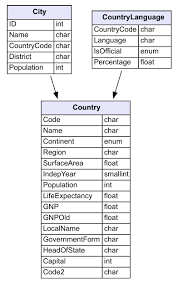

 Puedes generar el diagrama de la base de datos en https://dbdiagram.io/d

¿Cuál es el producto que aporta más beneficios?

In [1]:
import pandas as pd
import sqlite3
import pymysql

In [2]:
datos = pd.read_csv('ventas.csv')
datos

,no_orden,codigo_producto,cantidad_orden,precio_cada,nombre_producto,linea_productos,descr,precio_compra,fecha_orden,no_cliente,nombre_cliente,tlf,direccion,ciudad,estado,codigo_postal,pais
0,10100,S18_1749,30,136.00,1917 Grand Touring Sedan,Vintage Cars,Our Vintage Car models realistically portray a...,86.70,2003-01-06,363,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,Nashua,NH,62005,USA
1,10100,S18_2248,50,55.09,1911 Ford Town Car,Vintage Cars,Our Vintage Car models realistically portray a...,33.30,2003-01-06,363,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,Nashua,NH,62005,USA
2,10100,S18_4409,22,75.46,1932 Alfa Romeo 8C2300 Spider Sport,Vintage Cars,Our Vintage Car models realistically portray a...,43.26,2003-01-06,363,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,Nashua,NH,62005,USA
3,10100,S24_3969,49,35.29,1936 Mercedes Benz 500k Roadster,Vintage Cars,Our Vintage Car models realistically portray a...,21.75,2003-01-06,363,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,Nashua,NH,62005,USA
4,10101,S18_2325,25,108.06,1932 Model A Ford J-Coupe,Vintage Cars,Our Vintage Car models realistically portray a...,58.48,2003-01-09,128,"Blauer See Auto, Co.",+49 69 66 90 2555,Lyonerstr. 34,Frankfurt,NaN,60528,Germany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2991,10425,S24_2300,49,127.79,1962 Volkswagen Microbus,Trucks and Buses,The Truck and Bus models are realistic replica...,61.34,2005-05-31,119,La Rochelle Gifts,40.67.8555,"67, rue des Cinquante Otages",Nantes,NaN,44000,France
2992,10425,S24_2840,31,31.82,1958 Chevy Corvette Limited Edition,Classic Cars,Attention car enthusiasts: Make your wildest c...,15.91,2005-05-31,119,La Rochelle Gifts,40.67.8555,"67, rue des Cinquante Otages",Nantes,NaN,44000,France
2993,10425,S32_1268,41,83.79,1980’s GM Manhattan Express,Trucks and Buses,The Truck and Bus models are realistic replica...,53.93,2005-05-31,119,La Rochelle Gifts,40.67.8555,"67, rue des Cinquante Otages",Nantes,NaN,44000,France
2994,10425,S32_2509,11,50.32,1954 Greyhound Scenicruiser,Trucks and Buses,The Truck and Bus models are realistic replica...,25.98,2005-05-31,119,La Rochelle Gifts,40.67.8555,"67, rue des Cinquante Otages",Nantes,NaN,44000,France


In [3]:
# Dimension Cliente

cols = ['no_cliente', 'nombre_cliente', 'tlf', 'direccion', 'ciudad','estado','codigo_postal','pais']
cliente = datos[cols]
cliente.drop_duplicates(inplace=True)

cliente

C:\Users\Victor\AppData\Local\Temp\ipykernel_21212\1083564285.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cliente.drop_duplicates(inplace=True)


,no_cliente,nombre_cliente,tlf,direccion,ciudad,estado,codigo_postal,pais
0,363,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,Nashua,NH,62005,USA
4,128,"Blauer See Auto, Co.",+49 69 66 90 2555,Lyonerstr. 34,Frankfurt,NaN,60528,Germany
8,181,Vitachrome Inc.,2125551500,2678 Kingston Rd.,NYC,NY,10022,USA
10,121,Baane Mini Imports,07-98 9555,Erling Skakkes gate 78,Stavern,NaN,4110,Norway
26,141,Euro+ Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,NaN,28034,Spain
...,...,...,...,...,...,...,...,...
1619,204,Online Mini Collectables,6175557555,7635 Spinnaker Dr.,Brickhaven,MA,58339,USA
1650,249,Amica Models & Co.,011-4988555,Via Monte Bianco 34,Torino,NaN,10100,Italy
1708,299,"NorwayGifts By Mail, Co.",+47 2212 1555,Drammensveien 126A,Oslo,NaN,N 0106,Norway
1721,286,Marta's Replicas Co.,6175558555,39323 Spinnaker Dr.,Cambridge,MA,51247,USA


In [5]:
# Dimension Producto

cols = ['codigo_producto', 'nombre_producto', 'linea_productos', 'precio_compra']
producto = datos[cols]
producto.drop_duplicates()

producto

,codigo_producto,nombre_producto,linea_productos,precio_compra
0,S18_1749,1917 Grand Touring Sedan,Vintage Cars,86.70
1,S18_2248,1911 Ford Town Car,Vintage Cars,33.30
2,S18_4409,1932 Alfa Romeo 8C2300 Spider Sport,Vintage Cars,43.26
3,S24_3969,1936 Mercedes Benz 500k Roadster,Vintage Cars,21.75
4,S18_2325,1932 Model A Ford J-Coupe,Vintage Cars,58.48
...,...,...,...,...
2991,S24_2300,1962 Volkswagen Microbus,Trucks and Buses,61.34
2992,S24_2840,1958 Chevy Corvette Limited Edition,Classic Cars,15.91
2993,S32_1268,1980’s GM Manhattan Express,Trucks and Buses,53.93
2994,S32_2509,1954 Greyhound Scenicruiser,Trucks and Buses,25.98


In [ ]:
# Dimension linea de productos

cols = ['codigo_producto','linea_productos']
linea = datos[cols]
linea.drop_duplicates(inplace=True)

linea 

In [ ]:
#Tabla de hechos ventas

cols = ['no_cliente', 'nombre_cliente', 'tlf', 'direccion', 'ciudad','estado','codigo_postal','pais']
ventas = datos[cols]
ventas.drop_duplicates(inplace=True)

ventas

In [ ]:
conn = sqlite3.connect('karls.sqlite')

In [ ]:
cliente.to_sql('CLIENTE', conn, index=False, if_exists='replace')

In [ ]:
producto.to_sql('PRODUCTO', conn, index=False, if_exists='replace')

In [ ]:
ventas.to_sql('VENTAS', conn, index=False, if_exists='replace')

In [ ]:
linea.to_sql('LINEA', conn, index=False, if_exists='replace')